In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Copper.csv")

In [5]:
print(df)

            Date   Price    Open    High     Low    Vol. Change %
0     04/11/2023  4.0192  3.9928  4.0207  3.9783     NaN    1.07%
1     04/10/2023  3.9765  4.0180  4.0395  3.9630  56.66K   -0.98%
2     04/09/2023  4.0160  4.0172  4.0282  4.0160     NaN    0.01%
3     04/06/2023  4.0155  3.9825  4.0315  3.9710  87.26K    0.73%
4     04/05/2023  3.9865  3.9740  3.9960  3.9260  68.50K    0.39%
...          ...     ...     ...     ...     ...     ...      ...
3404  01/08/2010  3.4005  3.4340  3.4480  3.3915  26.08K   -0.77%
3405  01/07/2010  3.4270  3.4905  3.5440  3.4255  24.01K   -1.93%
3406  01/06/2010  3.4945  3.4190  3.5220  3.4125  25.93K    2.37%
3407  01/05/2010  3.4135  3.4135  3.4295  3.3820  18.11K    0.22%
3408  01/04/2010  3.4060  3.3500  3.4290  3.3465  22.61K    1.78%

[3409 rows x 7 columns]


In [17]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,month
0,2023-04-11,4.0192,3.9928,4.0207,3.9783,NaN,1.07%,4
1,2023-04-10,3.9765,4.0180,4.0395,3.9630,56.66K,-0.98%,4
2,2023-04-09,4.0160,4.0172,4.0282,4.0160,NaN,0.01%,4
3,2023-04-06,4.0155,3.9825,4.0315,3.9710,87.26K,0.73%,4
4,2023-04-05,3.9865,3.9740,3.9960,3.9260,68.50K,0.39%,4


In [19]:
df['Price'] = df['Price']*2204

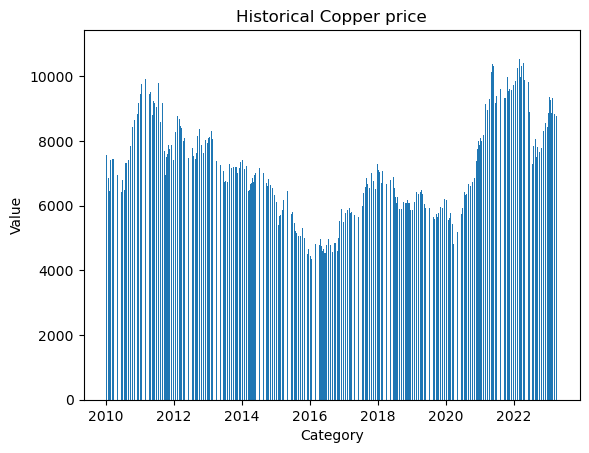

In [20]:
plt.bar(df['Date'], df['Price'])
plt.title('Historical Copper price')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

In [25]:
df['Date']=pd.to_datetime(df['Date'])

df['daily']=df['Date'].dt.year

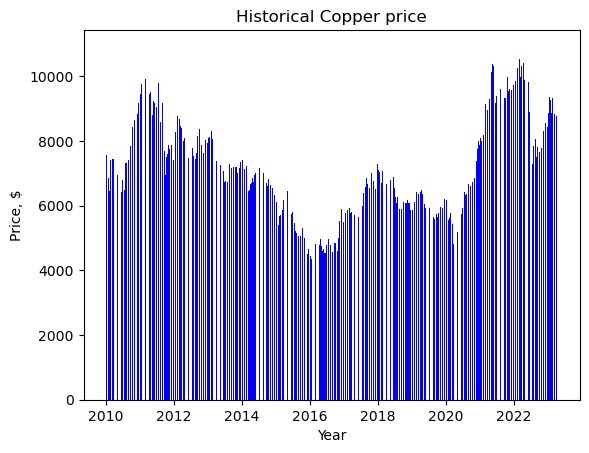

In [27]:
plt.bar(df['Date'], df['Price'], label="Date",color=['blue'])
plt.title('Historical Copper price')
plt.xlabel('Year')
plt.ylabel('Price, $')
plt.show()

# Copper chart with high-low prices

In [64]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [91]:
#load the csv data, 
#convert the date column to a datetime object
#set the date column as the index
df = pd.read_csv('Copper.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [92]:
df.head()

,Close,Open,High,Low,Volume,Change %
Date,,,,,,
2023-04-11,"8,858.32","8,800.13","8,861.62",8768.1732,NaN,1.07%
2023-04-10,"8,764.21","8,855.67","8,903.06",8734.4520,56.66K,-0.98%
2023-04-09,"8,851.26","8,853.91","8,878.15",8851.2640,NaN,0.01%
2023-04-06,"8,850.16","8,777.43","8,885.43",8752.0840,87.26K,0.73%
2023-04-05,"8,786.25","8,758.70","8,807.18",8652.9040,68.50K,0.39%


In [97]:
ohlc_dict = {'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'}
weekly_prices = df.resample('W').apply(ohlc_dict).dropna()

In [111]:
df = pd.read_csv('Copper.csv', parse_dates=True, index_col='Date')
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric)

In [112]:
# Resample the data to weekly frequency
weekly_prices = df.resample('W').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})


C:\Users\Feliks.Chilingaryan\Anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


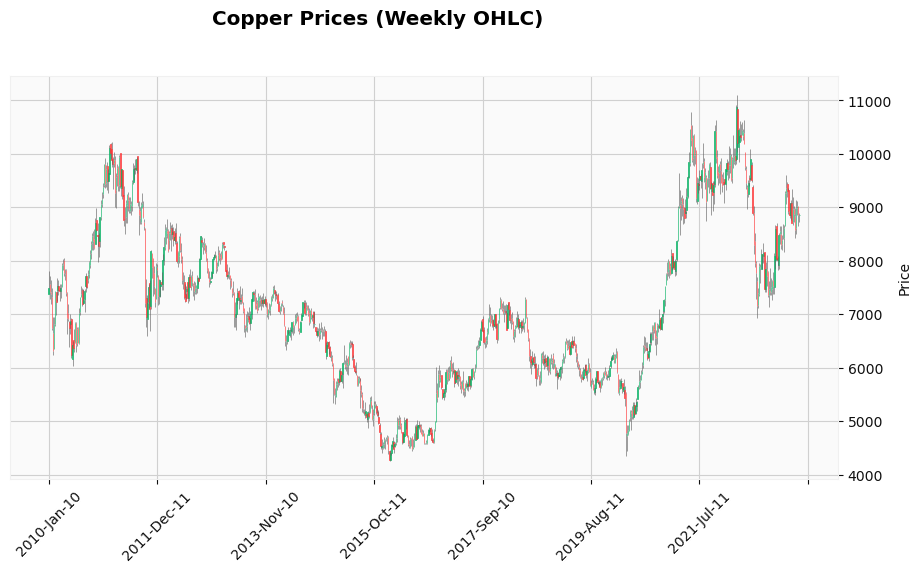

In [113]:
# Plot a candlestick chart using mplfinance
mpf.plot(weekly_prices, type='candle', style='yahoo', figratio=(12,6), title='Copper Prices (Weekly OHLC)')